In [1]:
import json

In [2]:
# import data from ../dataset/miniData.json
with open("../dataset/rawData/non_adult_raw_data.json", "r") as f:
    safeData = json.load(f)
with open("../dataset/rawData/adult_raw_data.json", "r") as f:
    adultData = json.load(f)
# get inbween data-points
with open("../dataset/rawData/inbetweenSafe.json", "r") as f:
    inBetweenData = json.load(f)
# combine datasets
mainData = safeData + adultData + inBetweenData

### Feature names and type

In [14]:
import pandas as pd

featureLabels = list(safeData[0].keys())
featureInfo = list(zip(featureLabels, [type(safeData[0][featureLabel]) for featureLabel in featureLabels]))
featureInfo_df = pd.DataFrame(featureInfo, columns=['Feature', 'Type'])
featureInfo_df

,Feature,Type
0,url,<class 'str'>
1,title,<class 'str'>
2,meta_description,<class 'str'>
3,headings,<class 'dict'>
4,main_content,<class 'list'>
5,links,<class 'dict'>
6,label,<class 'str'>


In [16]:
# Calculate the average URL length for each dataset
def average_url_length(data):
    total_length = sum(len(item['url']) for item in data)
    return total_length / len(data)

avg_url_length_safe = average_url_length(safeData)
avg_url_length_adult = average_url_length(adultData)
avg_url_length_inbetween = average_url_length(inBetweenData)

avg_url_length_safe, avg_url_length_adult, avg_url_length_inbetween
print("Average URL length for safe data: ", avg_url_length_safe, "\nAverage URL length for adult data: ", avg_url_length_adult, "\nAverage URL length for inbetween data: ", avg_url_length_inbetween)

Average URL length for safe data:  59.093556928508384 
Average URL length for adult data:  15.180489841358197 
Average URL length for inbetween data:  31.685185185185187


In [21]:
def count_pages_without_title_or_meta(data):
    return round((sum(1 for item in data if not item.get('title') or not item.get('meta_description'))/len(data))*100, 4)

count_no_title_or_meta_safe = count_pages_without_title_or_meta(safeData)
count_no_title_or_meta_adult = count_pages_without_title_or_meta(adultData)
count_no_title_or_meta_inbetween = count_pages_without_title_or_meta(inBetweenData)

count_no_title_or_meta_safe, count_no_title_or_meta_adult, count_no_title_or_meta_inbetween

(19.1149, 32.7025, 18.5185)

In [25]:
def format(output):
    return str(round(output*100,4))
def average_headings(data):
    total_h1 = sum(len(item['headings']['h1']) for item in data)
    total_h2 = sum(len(item['headings']['h2']) for item in data)
    avg_h1 = total_h1 / len(data)
    avg_h2 = total_h2 / len(data)

    return format(avg_h1), format(avg_h2)

avg_h1_safe, avg_h2_safe = average_headings(safeData)
avg_h1_adult, avg_h2_adult = average_headings(adultData)
avg_h1_inbetween, avg_h2_inbetween = average_headings(inBetweenData)

print("Average number of h1 elements for safe data: ", avg_h1_safe, "\nAverage number of h2 elements for safe data: ", avg_h2_safe)
print("Average number of h1 elements for adult data: ", avg_h1_adult, "\nAverage number of h2 elements for adult data: ", avg_h2_adult)
print("Average number of h1 elements for inbetween data: ", avg_h1_inbetween, "\nAverage number of h2 elements for inbetween data: ", avg_h2_inbetween)

Average number of h1 elements for safe data:  90.0895 
Average number of h2 elements for safe data:  297.0958
Average number of h1 elements for adult data:  74.9095 
Average number of h2 elements for adult data:  195.3938
Average number of h1 elements for inbetween data:  85.1852 
Average number of h2 elements for inbetween data:  559.2593


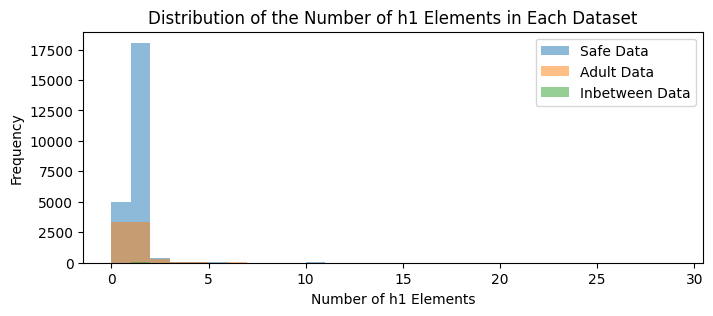

In [45]:
import matplotlib.pyplot as plt
def count_h1_elements(data):
    return [len(item['headings']['h1']) for item in data]

h1_counts_safe = count_h1_elements(safeData)
h1_counts_adult = count_h1_elements(adultData)
h1_counts_inbetween = count_h1_elements(inBetweenData)

plt.figure(figsize=(8, 3))
plt.hist(h1_counts_safe, bins=range(0, 20), alpha=0.5, label='Safe Data')
plt.hist(h1_counts_adult, bins=range(0, 30), alpha=0.5, label='Adult Data')
plt.hist(h1_counts_inbetween, bins=range(0, 20), alpha=0.5, label='Inbetween Data')

plt.xlabel('Number of h1 Elements')
plt.ylabel('Frequency')
plt.title('Distribution of the Number of h1 Elements in Each Dataset')
plt.legend(loc='upper right')
plt.show()

## Array length analysis

### Internal links

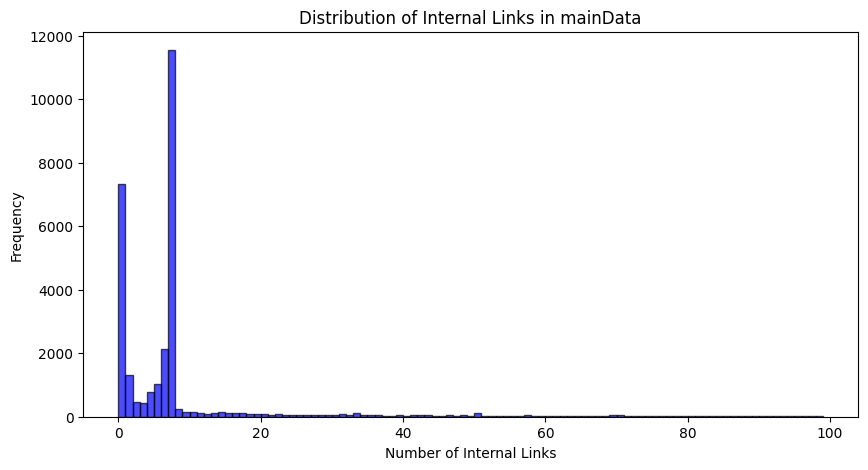

In [61]:
import matplotlib.pyplot as plt

def count_internal_links(data):
    return [len(item['links']['internal']) for item in data]

internal_links_counts = count_internal_links(mainData)

plt.figure(figsize=(10, 5))
plt.hist(internal_links_counts, bins=range(0, 100), alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Number of Internal Links')
plt.ylabel('Frequency')
plt.title('Distribution of Internal Links in mainData')
plt.show()

In [98]:
k = 10  # You can change this value to any number you want

def proportion_less_than_k_links(data, k):
    count_less_than_k = sum(1 for item in data if (len(item['links']['internal']) < k))
    return count_less_than_k / len(data)

proportion_mainData_less_than_k_links = proportion_less_than_k_links(mainData, k)
print(f"Proportion of data points in mainData with less than {k} internal links: ", proportion_mainData_less_than_k_links)


Proportion of data points in mainData with less than 10 internal links:  0.8194824863854606


### External links

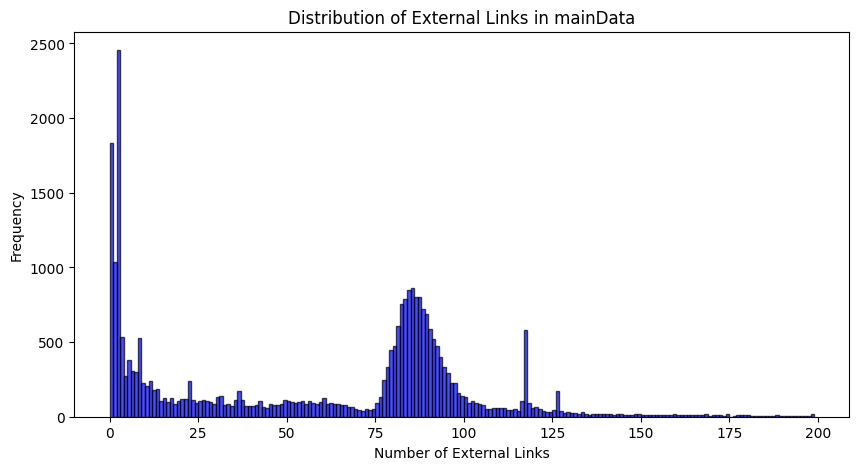

In [59]:
import matplotlib.pyplot as plt

def count_external_links(data):
    return [len(item['links']['external']) for item in data]

external_links_count = count_external_links(mainData)

plt.figure(figsize=(10, 5))
plt.hist(external_links_count, bins=range(0, 200), alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Number of External Links')
plt.ylabel('Frequency')
plt.title('Distribution of External Links in mainData')
plt.show()

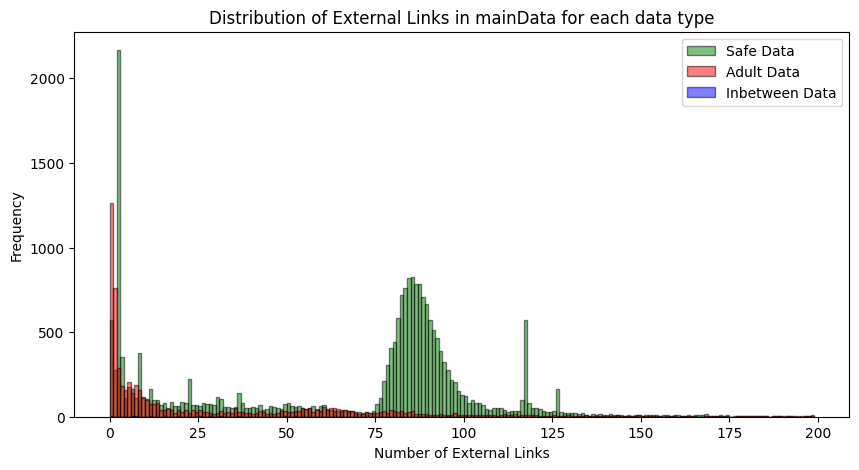

In [95]:
import matplotlib.pyplot as plt

def count_external_links(data):
    return [len(item['links']['external']) for item in data]

external_links_count = count_external_links(mainData)

plt.figure(figsize=(10, 5))
plt.xlabel('Number of External Links')
plt.ylabel('Frequency')
plt.title('Distribution of External Links in mainData for each data type')
plt.hist(count_external_links(safeData), bins=range(0, 200), alpha=0.5, color='green', edgecolor='black', label='Safe Data')
plt.hist(count_external_links(adultData), bins=range(0, 200), alpha=0.5, color='red', edgecolor='black', label='Adult Data')
plt.hist(count_external_links(inBetweenData), bins=range(0, 200), alpha=0.5, color='blue', edgecolor='black', label='Inbetween Data')
plt.legend(loc='upper right')
plt.show()

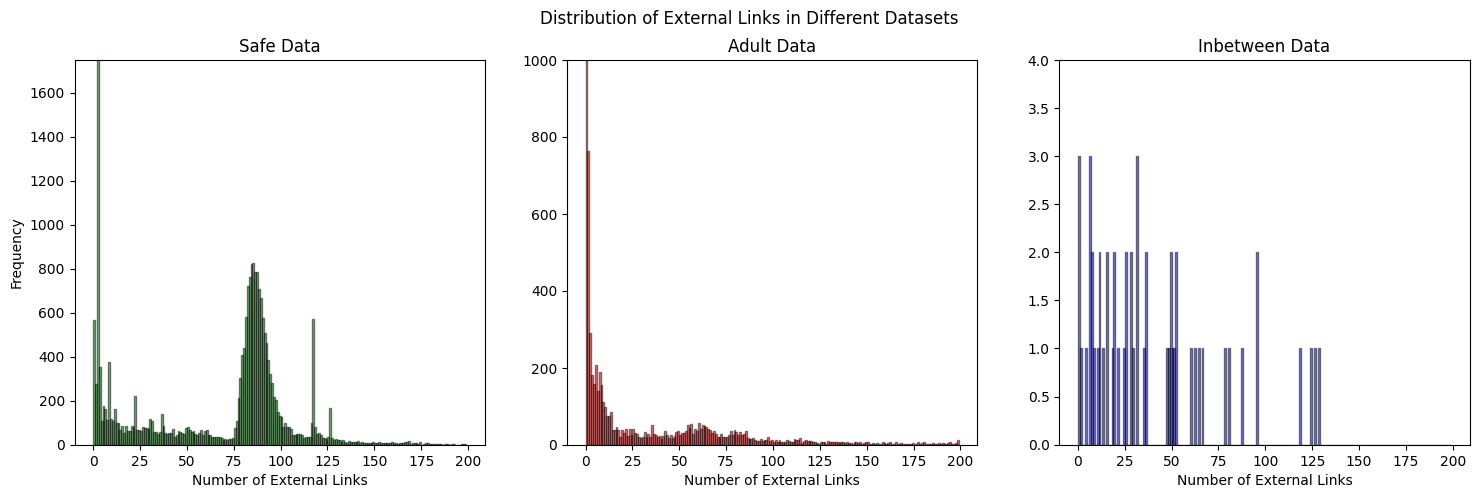

In [87]:
def count_external_links(data):
    return [len(item['links']['external']) for item in data]

external_links_count_safe = count_external_links(safeData)
external_links_count_adult = count_external_links(adultData)
external_links_count_inbetween = count_external_links(inBetweenData)

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)  # Ensure sharey=False for independent y-limits

axes[0].hist(external_links_count_safe, bins=range(0, 200), alpha=0.5, color='green', edgecolor='black')
axes[0].set_title('Safe Data')
axes[0].set_xlabel('Number of External Links')
axes[0].set_ylabel('Frequency')
axes[0].set_ylim(0, 1750)  # Unique y-limit for the first plot

axes[1].hist(external_links_count_adult, bins=range(0, 200), alpha=0.5, color='red', edgecolor='black')
axes[1].set_title('Adult Data')
axes[1].set_xlabel('Number of External Links')
axes[1].set_ylim(0, 1000)  # Unique y-limit for the second plot

axes[2].hist(external_links_count_inbetween, bins=range(0, 200), alpha=0.5, color='blue', edgecolor='black')
axes[2].set_title('Inbetween Data')
axes[2].set_xlabel('Number of External Links')
axes[2].set_ylim(0, 4)  # Unique y-limit for the third plot

fig.suptitle('Distribution of External Links in Different Datasets')
plt.show()

In [97]:
k = 100 # You can change this value to any number you want

def proportion_less_than_k_links(data, k):
    count_less_than_k = sum(1 for item in data if (len(item['links']['external']) < k))
    return count_less_than_k / len(data)

proportion_mainData_less_than_k_links = proportion_less_than_k_links(mainData, k)
print(f"Proportion of data points in mainData with less than {k} external links: ", proportion_mainData_less_than_k_links)


Proportion of data points in mainData with less than 100 external links:  0.849192794766861
